In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.pyplot import figure

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression().fit(X, y)

#Hint: .fit()

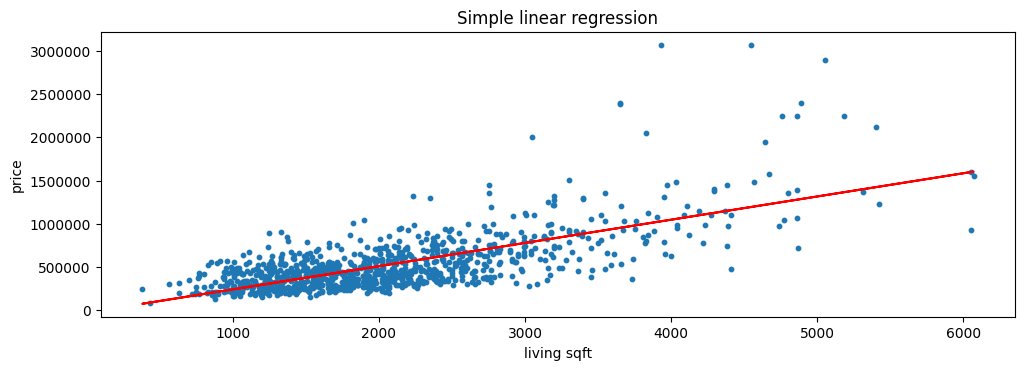

Mean squared error equals: 57947526161.288376
0.49670880166311393


In [3]:
#b)
sc = model.score(X, y)
predict = model.predict(X)

plt.rcParams["figure.figsize"] = (11.8,3.7)
plt.scatter(X, y, s=10)
plt.ticklabel_format(useOffset=False, style='plain')
plt.plot(X, predict, color = "red")
plt.title("Simple linear regression")
plt.xlabel("living sqft")
plt.ylabel("price")
plt.show()
print("Mean squared error equals:", mean_squared_error(y, predict))
print(sc)

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

# From the chart we can see that price doesn't depend only on living_sqft and not always larger house means more expensive.
# It is producing errors for regression function. Because of that our regression function doesn't look fitted to all points
# even though it is fitted as good as possible.
# Our model score is almost 0.5, looking at the best possible score which is 1.0, our model is nor too good or bad.

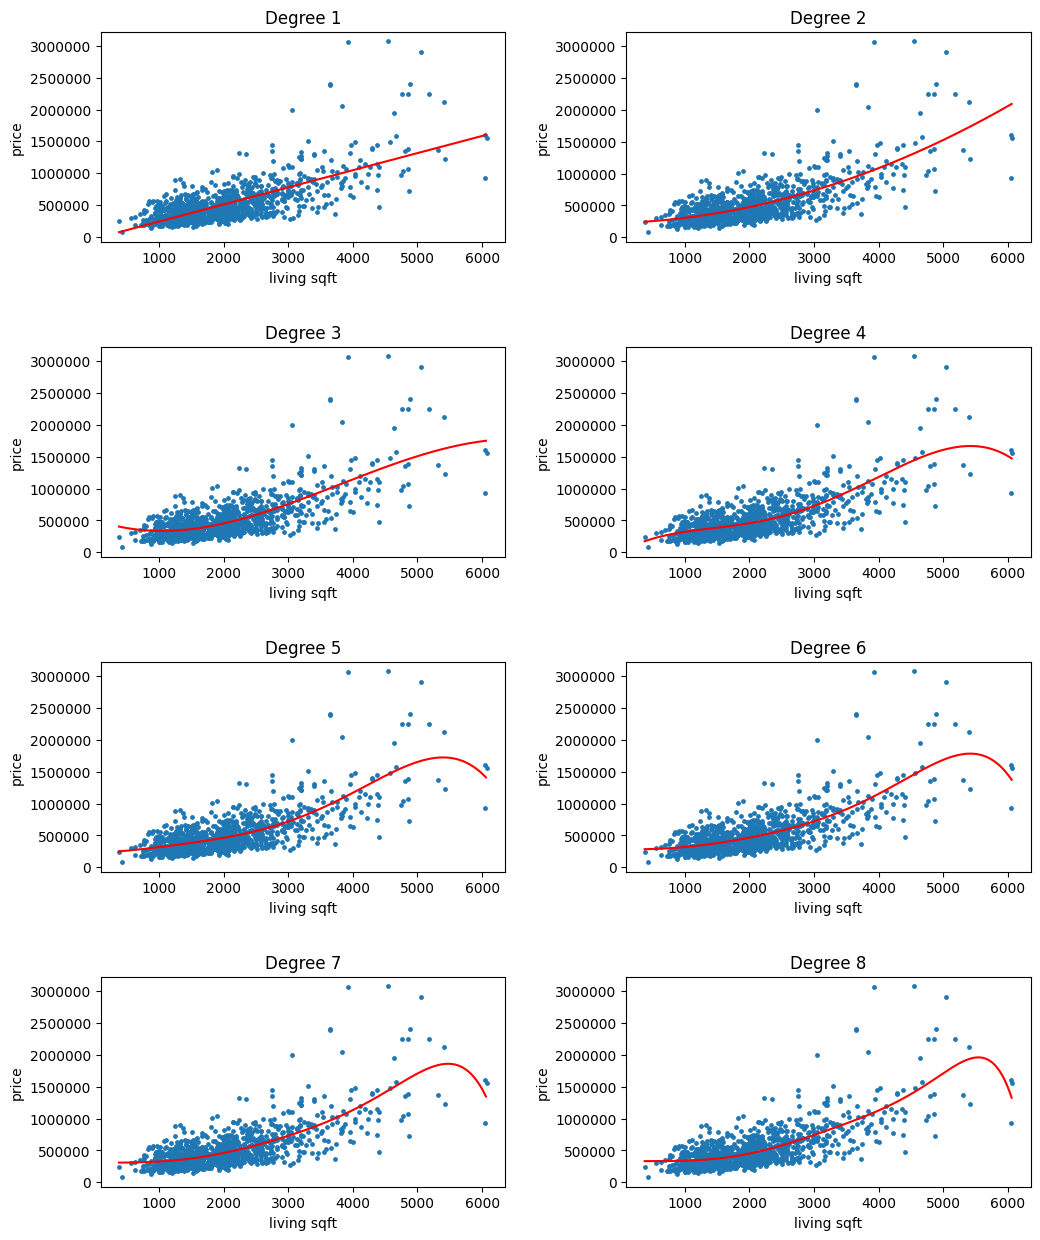

In [4]:
#c)
X_fit = np.arange(380,6070,10)[:, np.newaxis]
plt.figure(figsize=(12, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

error = []
orderr = []

for order in range(1,9):
    orderr.append(order)
    ax = plt.subplot(4, 2, order)

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    model.fit(X_order, y)

    ax.set_title(f'Degree {order}')
    ax.set_xlabel("living sqft")
    ax.set_ylabel("price")
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.scatter(X, y, s=6)

    error.append(mean_squared_error(y, model.predict(X_order)))

    ax.plot(X_fit, model.predict(poly.fit_transform(X_fit)), color='red')

plt.show()

# Charts below shows us how our polynomial regression model is behaving in next iterations. We can see that in next iterations
# our model is getting more curve shape but also it fits better and better to our data because the mean error is getting smaller.

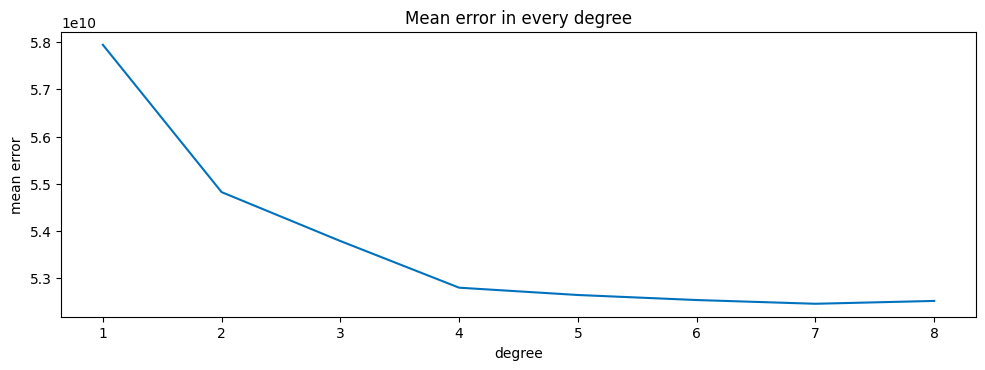

In [5]:
plt.xlabel('degree')
plt.ylabel('mean error')
plt.title("Mean error in every degree")
plt.plot(orderr, error, color=(0, 0.4470, 0.7410))
plt.show()

# Below we can see how our mean squared error changes in every iteration. We can clearly see that the greater degree we have,
# the smaller error we get. It confirms what I mentioned in cell above, that model fits better to data in next iterations because
# mean error decreases. In first 4 iterations error decreases fast and then it starts to decrease slowly.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

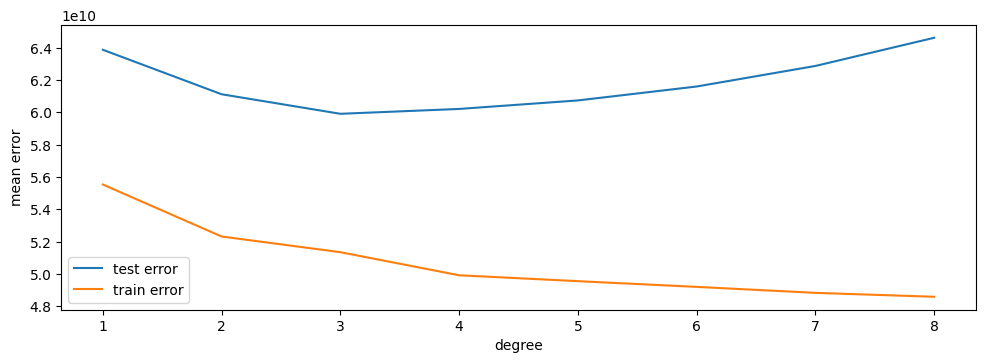

In [6]:
#a)
error1 = []
error2 = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    model_splitted = LinearRegression(fit_intercept=True)
    model_splitted.fit(X_train, y_train)

    error1.append(mean_squared_error(y_test, model_splitted.predict(X_test)))
    error2.append(mean_squared_error(y_train, model_splitted.predict(X_train)))

plt.plot(orderr, error1, label='test error')
plt.plot(orderr, error2, label='train error')
plt.xlabel('degree')
plt.ylabel('mean error')
plt.legend()
plt.show()

# Our data had to be split into training and test samples. Then our exercise was to compare these samples with mean squared errors.
# From the chart we can see that test error was decreasing in first three iterations but then it started to increase. We have other
# situation with train error where mean error was decreasing in every iteration

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

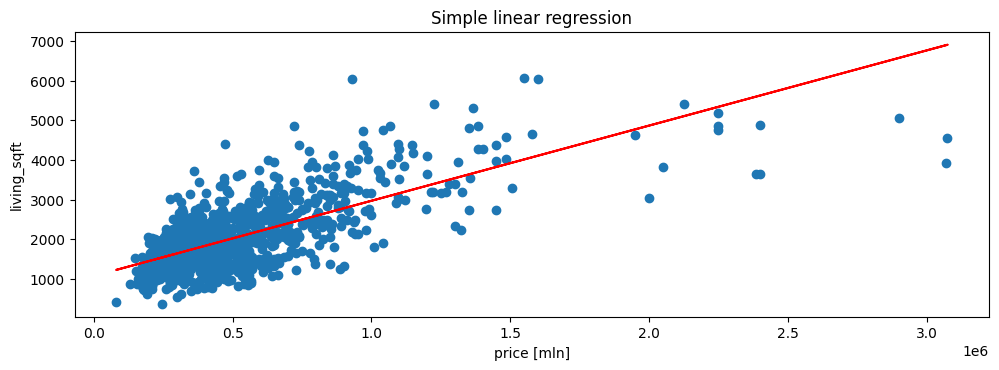

Mean squared error equals: 396958.836386541


In [7]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

new_model = LinearRegression()
new_model.fit(X_train, y_train)

plt.plot(X, X * new_model.coef_ + new_model.intercept_, "r")
plt.scatter(X, y)

plt.xlabel('price [mln]')
plt.ylabel('living_sqft')
plt.title('Simple linear regression')
plt.show()

print("Mean squared error equals:", mean_squared_error(y, X * new_model.coef_ + new_model.intercept_))

# Here the exercise was to create model which will predict square footage of the apartments living space for price which was given.
# Charts shows the plotted predictions.

In [8]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 48749180751.9038


In [9]:
#Your model 1:
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=38)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

# By changing random_state value in train_test_split function to 38 we are slightly decreasing a mean squared error by around 3,5%

Mean squared error equals: 47060625999.98675


In [10]:
#Your model 2:
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=38)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

# Going forward if we change random_state value to 38 and test_size to 0.4 we are having better result and our mean squared error
# is decreased by 8.4%

Mean squared error equals: 44655279279.29429


As shown above we can decrease mean squared error a little, so make our model more precise by simple changes in parameters
of function. Or as shown below we can use living sqft, lot sqft, grade, view and floors and change parameters of function, but
we are getting similar results.

In [11]:
#Your model 1:
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'floors']].values.reshape(-1,5)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=36)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 42392445240.044464
